In [34]:
#This code is a basic implementation of a logistic regression model for binary classification applied for the titanic kaggle competition

import numpy as np
import pandas as pd
import csv


#Extract Passenger information to Xtrain with Pclass, Sex, Age, SibSp, Parch, Fare, Embarked and Ytrain with surpervivence info 

train_df = pd.read_csv (r'../data/train.csv')
Xtrain = train_df.drop(["Ticket","Name","Cabin","PassengerId", "Survived"], axis = 1)
Ytrain = train_df["Survived"].to_numpy()
Ytrain = Ytrain.reshape((Ytrain.shape[0],1))
Xtrain["Sex"] = Xtrain["Sex"].apply(lambda x: 0 if x == "male" else 1)
Xtrain["Age"] = Xtrain["Age"].fillna(Xtrain["Age"].mean())
Xtrain["Embarked"] = Xtrain["Embarked"].apply(lambda x: 0 if x == "C" else 1 if x == "Q" else 2 )
Xtrain = Xtrain.to_numpy().T

#Extract test information for making the submision file
test_df = pd.read_csv(r'../data/test.csv')
print(test_df)
Xtest = test_df.drop(["Ticket","Name","Cabin","PassengerId"], axis = 1)
Xtest["Sex"] = Xtest["Sex"].apply(lambda x: 0 if x == "male" else 1)
Xtest["Age"] = Xtest["Age"].fillna(Xtest["Age"].mean())
Xtest["Embarked"] = Xtest["Embarked"].apply(lambda x: 0 if x == "C" else 1 if x == "Q" else 2 )
Xtest = Xtest.to_numpy().T
print(Xtest.shape)


     PassengerId  Pclass                                          Name  \
0            892       3                              Kelly, Mr. James   
1            893       3              Wilkes, Mrs. James (Ellen Needs)   
2            894       2                     Myles, Mr. Thomas Francis   
3            895       3                              Wirz, Mr. Albert   
4            896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)   
..           ...     ...                                           ...   
413         1305       3                            Spector, Mr. Woolf   
414         1306       1                  Oliva y Ocana, Dona. Fermina   
415         1307       3                  Saether, Mr. Simon Sivertsen   
416         1308       3                           Ware, Mr. Frederick   
417         1309       3                      Peter, Master. Michael J   

        Sex   Age  SibSp  Parch              Ticket      Fare Cabin Embarked  
0      male  34.5      0      0 

In [35]:
#Implementation of logistic regression algorithm

def sigmoid(z):
    #Returns sigmoid of z (scalar or array)
    return 1/(1+np.exp(-z))

def prediction(X, w, b):
    """
    X: Matrix of size (model parameters, number of examples)
    w: vector of size (model parameters)
    b: bias scalar
    """ 
    sigmaZ = sigmoid(np.dot(w.T,X)+b)
    f = np.vectorize(lambda x: 0 if x < 0.5 else 1)
    return f(sigmaZ).T
    
def propagate(X,Y,w,b,learning_rate):
    """
    Generates the next step of the model parameters w and b
    X: Matrix of size (model parameters, number of examples)
    w: vector of size (model parameters)
    b: bias scalar
    learning_rate (alpha): scalar. Tunes the step size
    """
    m = X.shape[1]
    sigmaZ = sigmoid(np.dot(w.T,X)+b)
    dZ = sigmaZ-Y.T
    dw = np.dot(X,dZ.T)/m
    db = dZ.sum()/m
    
    w = w-learning_rate*dw
    b = b-learning_rate*db
    
    return w,b


def training(X,Y,learning_rate,train_steps):
     """
    Iterates over a certain amount of train steps to find the optimal parameter values for w and b
    X: Matrix of size (model parameters, number of examples)
    w: vector of size (model parameters)
    b: bias real scalar
    learning_rate (alpha): real scalar. Tunes the step size
    """
    w = np.zeros((Xtrain.shape[0],1))
    b = 0
    
    for i in range(train_steps):
        w, b = propagate(X,Y,w,b,learning_rate)
        
    return w,b

#Training applied to the train data
w,b = training(Xtrain,Ytrain,0.00005, 1000000)
Yresult_train = prediction(Xtrain,w,b)
#Verification over training data.
print("Precision on training data: ",100*(Yresult_train-Ytrain).sum()/Ytrain.shape[0], "")


-3.9281705948372614


In [ ]:
#Use of obtained parameters in the test data and write down it into a csv file for submission

Ytest = prediction(Xtest,w,b)
test_passenger_id = test_df["PassengerId"].to_numpy().reshape((Ytest.shape[0],1))
data = np.array([test_passenger_id,Ytest]).T[0]


header = ["PassengerId","Survived"]
with open('results.csv', 'w', encoding='UTF8', newline='') as f:
    writer = csv.writer(f)

    # write the header
    writer.writerow(header)

    # write multiple rows
    writer.writerows(data)

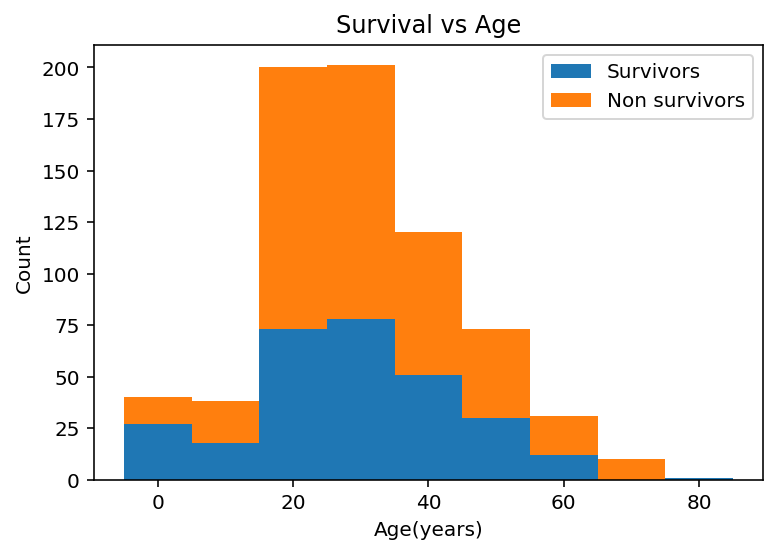

In [123]:
### Visual analisis of the training data ###

import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

age_survival_data = train_df[["Age","Survived"]]
age_survival_count = []
age_dead_count = []
for index, row in age_survival_data.iterrows():
    if row["Survived"] == 0:
        age_dead_count.append(row["Age"])
    if row["Survived"] == 1:
        age_survival_count.append(row["Age"])

        
plt.hist([age_survival_count, age_dead_count],bins = np.arange(-5,95,10),histtype='bar', stacked=True, label = ["Survivors","Non survivors"])
plt.legend()
plt.title("Survival vs Age")
plt.ylabel("Count")
plt.xlabel("Age(years)")
plt.show()

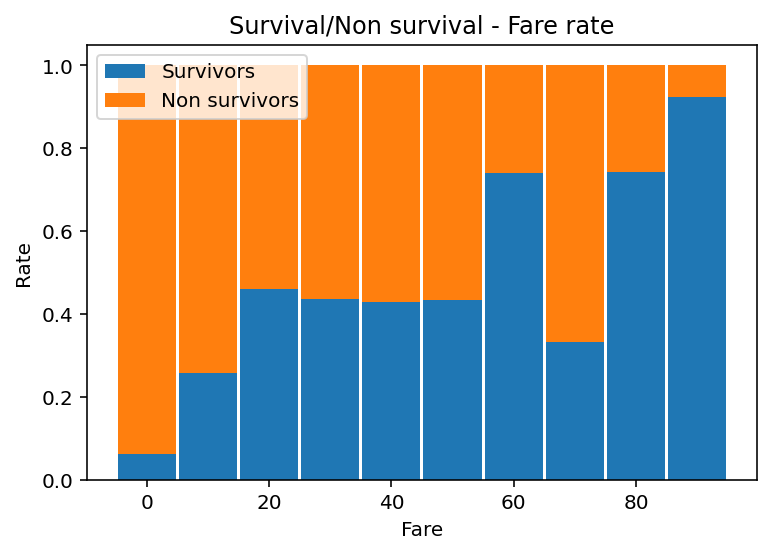

In [124]:
fare_survival_data = train_df[["Fare","Survived"]]
fare_survival_count = []
fare_dead_count = []
for index, row in fare_survival_data.iterrows():
    if row["Survived"] == 0:
        fare_dead_count.append(row["Fare"])
    if row["Survived"] == 1:
        fare_survival_count.append(row["Fare"])

fare_surv_hist, bin_edge = np.histogram(fare_survival_count,bins = np.arange(-5,100,10))
fare_dead_hist, bin_edge = np.histogram(fare_dead_count,bins = np.arange(-5,100,10))
surv_rate = fare_surv_hist/(fare_surv_hist+fare_dead_hist)
dead_rate = fare_dead_hist/(fare_surv_hist+fare_dead_hist)

plt.bar(bin_edge[1:]-5,surv_rate, label = "Survivors", width = 9.5)
plt.bar(bin_edge[1:]-5,dead_rate, label = "Non survivors", width = 9.5, bottom = surv_rate)
plt.legend()
plt.title("Survival/Non survival - Fare rate")
plt.ylabel("Rate")
plt.xlabel("Fare")
plt.show()

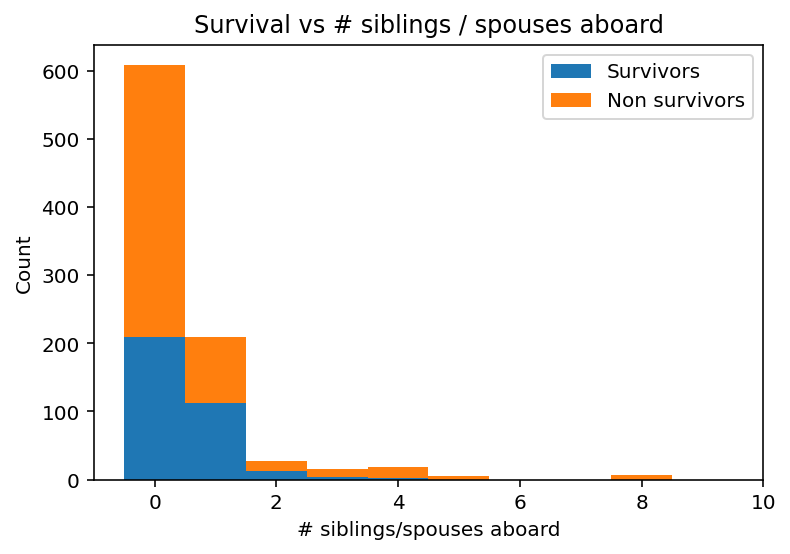

In [125]:
sib_survival_data = train_df[["SibSp","Survived"]]
sib_survival_count = []
sib_dead_count = []
for index, row in sib_survival_data.iterrows():
    if row["Survived"] == 0:
        sib_dead_count.append(row["SibSp"])
    if row["Survived"] == 1:
        sib_survival_count.append(row["SibSp"])

        
plt.hist([sib_survival_count, sib_dead_count],bins = np.arange(-0.5,9.6,1),histtype='bar',stacked=True, label = ["Survivors","Non survivors"])
plt.legend()
plt.title("Survival vs # siblings / spouses aboard")
plt.ylabel("Count")
plt.xlabel("# siblings/spouses aboard")
plt.show()
plt.show()

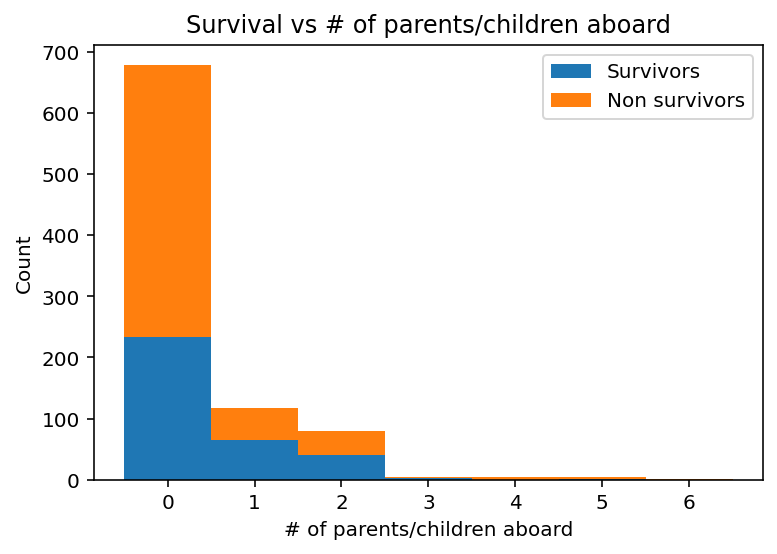

In [126]:
parch_survival_data = train_df[["Parch","Survived"]]
parch_survival_count = []
parch_dead_count = []
for index, row in parch_survival_data.iterrows():
    if row["Survived"] == 0:
        parch_dead_count.append(row["Parch"])
    if row["Survived"] == 1:
        parch_survival_count.append(row["Parch"])

        
plt.hist([parch_survival_count, parch_dead_count],bins = np.arange(-0.5,6.6,1),histtype='bar',stacked=True, label = ["Survivors","Non survivors"])
plt.legend()
plt.title("Survival vs # of parents/children aboard")
plt.ylabel("Count")
plt.xlabel("# of parents/children aboard")
plt.show()